<a href="https://colab.research.google.com/github/DrDimos/Dissertation/blob/main/Best_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Imports

1.   NumPy
2.   Tensorflow
1.   Matplotlib
2.   Time

## *NumPy Library Imports*

In [ ]:
import numpy as np
from numpy import genfromtxt
from numpy import argmin, argmax

## *TensorFlow Library Imports*

In [ ]:
import tensorflow as tf
from tensorflow import keras,metrics, math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input, LSTM, ConvLSTM1D, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy, CategoricalAccuracy, Precision, PrecisionAtRecall, Recall, RecallAtPrecision, AUC, SensitivityAtSpecificity, SpecificityAtSensitivity
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

## *Sklearn Library Imports*

In [ ]:
import sklearn
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## *Matplotlib Library Imports*

In [ ]:
import matplotlib.pyplot as plt

## Time Libray Imports

In [ ]:
import time

## Google Colab File Imports


In [ ]:
from google.colab import files
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Prediction Set

In [ ]:
def Data_Sampling(Signal_Coefficients, Max_Length):
    Sampled = []
    for signal in Signal_Coefficients:
        if (len(signal) < Max_Length):
            Sample_Padding = Max_Length-len(signal)%Max_Length
            Sampled_Temp = np.pad(signal, (0,Sample_Padding), 'constant')
        Sampled.append(Sampled_Temp)
    Sampled = np.array(Sampled, dtype=np.float16)
    return Sampled

In [ ]:
Uknown_Signals_path = '/content/drive/MyDrive/Independent_Signals/Window_List_0.csv'
Unkown_Signals = []

Preditction_Files_loading_time_start = time.time()
# for filename in os.listdir(Uknown_Signals_path):
#   file = os.path.join(Uknown_Signals_path, filename)
temp_np_file = np.genfromtxt(Uknown_Signals_path, delimiter=",")
Max_Length_Window = len(max(temp_np_file, key=len))
Max_Sampling_Length_Window = Max_Length_Window + (10-(Max_Length_Window%10))
temp_np_file_sampled = Data_Sampling(temp_np_file, Max_Sampling_Length_Window)
temp_np_file_sampled = temp_np_file_sampled.reshape(temp_np_file_sampled.shape[0],temp_np_file_sampled.shape[1],1)
Unkown_Signals.append(temp_np_file_sampled)
Preditction_Files_loading_time_end = time.time()
Preditction_Files_loading_execution_time = Preditction_Files_loading_time_end-Preditction_Files_loading_time_start

print("\n \t\t\t Prediction Loading Signals Time in seconds: \t\t", Preditction_Files_loading_execution_time)


 			 Prediction Loading Signals Time in seconds: 		 29.034316539764404


# Import Data from the respective test and train "CSV" files.

In [ ]:
loading_time_start = time.time()

Train_fname = '/content/drive/My Drive/Train_Test_Data/DF04/Sel_Sliced/NN_Train_Set_70_30_Selected_FilterOrder_4_Sliced.csv'
Test_fname = '/content/drive/My Drive/Train_Test_Data/DF04/Sel_Sliced/NN_Test_Set_70_30_Selected_FilterOrder_4_Sliced.csv'

Train_Dataset = np.genfromtxt(Train_fname, delimiter=",", dtype=np.float16)
Test_Dataset = np.genfromtxt(Test_fname, delimiter=",", dtype=np.float16)
X_Train_Values = Train_Dataset[:,:-1]
Y_Train_Labels = Train_Dataset[:,-1]
Y_Train_Labels_Categorical = to_categorical(Train_Dataset[:,-1])
Test_Validation_Split = int(len(Test_Dataset)/2)
X_Validation_Values = Test_Dataset[:Test_Validation_Split,:-1]
Y_Validation_Labels = Test_Dataset[:Test_Validation_Split,-1]
Y_Validation_Labels_Categorical = to_categorical(Y_Validation_Labels)
X_Test_Values = Test_Dataset[Test_Validation_Split:,:-1]
Y_Test_Labels = Test_Dataset[Test_Validation_Split:,-1]
Y_Test_Labels_Categorical = to_categorical(Y_Test_Labels)
loading_time_end = time.time()
loading_execution_time = loading_time_end-loading_time_start

print("\n \t\t\t Train_Dataset - Shape: \t\t\t\t",Train_Dataset.shape)
print(" \t\t\t Test_Dataset - Shape: \t\t\t\t\t",Test_Dataset.shape)
print("\n \t\t\t X_Train_Values - Shape: \t\t\t\t",X_Train_Values.shape)
print("\t\t\t Y_Train_Labels - Shape: \t\t\t\t",Y_Train_Labels.shape)
print("\t\t\t Y_Train_Labels_Categorical - Shape: \t\t\t",Y_Train_Labels_Categorical.shape)
print("\n \t\t\t X_Validation_Values - Shape: \t\t\t\t",X_Validation_Values.shape)
print("\t\t\t Y_Validation_Labels - Shape: \t\t\t\t",Y_Validation_Labels.shape)
print("\t\t\t Y_Validation_Labels_Categorical - Shape: \t\t",Y_Validation_Labels_Categorical.shape)
print("\n \t\t\t X_Test_Values - Shape: \t\t\t\t",X_Test_Values.shape)
print("\t\t\t Y_Test_Labels - Shape: \t\t\t\t",Y_Test_Labels.shape)
print("\t\t\t Y_Test_Labels_Categorical - Shape: \t\t\t",Y_Test_Labels_Categorical.shape)
print("\n \t\t\t Loading Time in seconds: \t\t\t\t", loading_execution_time)


 			 Train_Dataset - Shape: 				 (3416, 2511)
 			 Test_Dataset - Shape: 					 (1464, 2511)

 			 X_Train_Values - Shape: 				 (3416, 2510)
			 Y_Train_Labels - Shape: 				 (3416,)
			 Y_Train_Labels_Categorical - Shape: 			 (3416, 4)

 			 X_Validation_Values - Shape: 				 (732, 2510)
			 Y_Validation_Labels - Shape: 				 (732,)
			 Y_Validation_Labels_Categorical - Shape: 		 (732, 4)

 			 X_Test_Values - Shape: 				 (732, 2510)
			 Y_Test_Labels - Shape: 				 (732,)
			 Y_Test_Labels_Categorical - Shape: 			 (732, 4)

 			 Loading Time in seconds: 				 15.590593099594116


# Data Normalization for CNN, LSTM and ConvLSTM Models

In [ ]:
n_traces_train = X_Train_Values.shape[0]
print("\n \t\t\t Number of Train Traces: \t\t\t\t", n_traces_train)
n_features_train = X_Train_Values.shape[1]
print("\t\t\t Number of Train Features: \t\t\t\t", n_features_train)
n_output_train = len(np.unique(Y_Train_Labels))
print("\t\t\t Number of Output Train Labels: \t\t\t", n_output_train)
n_output_train_categorical = len(np.unique(Y_Train_Labels_Categorical))
print("\t\t\t Number of Output Categorical Train Labels: \t\t", n_output_train_categorical)

n_trace_val = X_Validation_Values.shape[0]
print("\n \t\t\t Number of Validation Traces: \t\t\t\t", n_trace_val)
n_features_val = X_Validation_Values.shape[1]
print("\t\t\t Number of Validation Features: \t\t\t", n_features_val)
n_output_val = len(np.unique(Y_Validation_Labels))
print("\t\t\t Number of Output Validation Labels: \t\t\t", n_output_val)
n_output_val_categorical = len(np.unique(Y_Validation_Labels_Categorical))
print("\t\t\t Number of Output Categorical Validation Labels: \t", n_output_val_categorical)

n_trace_test = X_Test_Values.shape[0]
print("\n \t\t\t Number of Test Traces: \t\t\t\t", n_trace_test)
n_features_test = X_Test_Values.shape[1]
print("\t\t\t Number of Test Features: \t\t\t\t", n_features_test)
n_output_test = len(np.unique(Y_Test_Labels))
print("\t\t\t Number of Output Test Labels: \t\t\t\t", n_output_test)
n_output_test_categorical = len(np.unique(Y_Test_Labels_Categorical))
print("\t\t\t Number of Output Categorical Test Labels: \t\t", n_output_test_categorical)

X_Train = X_Train_Values.reshape(n_traces_train,n_features_train,1)
print("\n \t\t\t X_Train - shape: \t\t\t\t\t", X_Train.shape)
X_Validate = X_Validation_Values.reshape(n_trace_val,n_features_val,1)
print("\n \t\t\t X_Validate - shape: \t\t\t\t\t", X_Validate.shape)
X_Test = X_Test_Values.reshape(n_trace_test,n_features_test,1)
print("\n \t\t\t X_Test - shape: \t\t\t\t\t", X_Test.shape)


 			 Number of Train Traces: 				 3416
			 Number of Train Features: 				 2510
			 Number of Output Train Labels: 			 4
			 Number of Output Categorical Train Labels: 		 2

 			 Number of Validation Traces: 				 732
			 Number of Validation Features: 			 2510
			 Number of Output Validation Labels: 			 4
			 Number of Output Categorical Validation Labels: 	 2

 			 Number of Test Traces: 				 732
			 Number of Test Features: 				 2510
			 Number of Output Test Labels: 				 4
			 Number of Output Categorical Test Labels: 		 2

 			 X_Train - shape: 					 (3416, 2510, 1)

 			 X_Validate - shape: 					 (732, 2510, 1)

 			 X_Test - shape: 					 (732, 2510, 1)


In [ ]:
Target_Names = ['Noise', 'Quake', 'Rockfall', 'Seism']
Learning_Rate = [1e-3, 1e-4, 1e-5]
Epochs = [10, 15, 25]
Batch_Size = [100, 128, 150]

Early_Stop = EarlyStopping(monitor='accuracy',mode='max',verbose=1,patience=5)

CNN_Scores = []
CNN_Score_Update = []
Best_Scores = []
Execution_Time = []
Y_Pred = []
CNN_Class_Y_Pred = []

LSTM_Scores = []
LSTM_Score_Update = []
LSTM_Best_Scores = []
LSTM_Y_Pred = []
LSTM_Class_Y_Pred = []
LSTM_Execution_Time = []


Best_Score_Update = []

# *Convolutional Neural Network (CNN)*

## Model Generator

In [ ]:
def CNN_Generate_Acc_Loss_Plot(History, rate, epoch, batch):
  plt.subplot(211)
  plt.plot(History.history['accuracy'])
  plt.plot(History.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Eopch')
  plt.legend(['Training', 'Validation'], loc='best')
        
  plt.subplot(212)
  plt.plot(History.history['loss'])
  plt.plot(History.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='best')
        
  plt.tight_layout()
  plt.gcf()
  plt.savefig('/content/drive/MyDrive/dissertation_results/CNN_lr_'+str(rate)+'e_'+str(epoch)+'b_'+str(batch)+'.png', bbox_inches='tight')
  plt.show()
  

In [ ]:
def Model_Generator(X_Train):
  CNN_Model = Sequential()
  CNN_Model.add(Conv1D(filters=16, kernel_size=3,  activation='relu', padding='same'))
  CNN_Model.add(Conv1D(filters=16, kernel_size=3,  activation='relu', padding='same'))
  CNN_Model.add(MaxPooling1D(pool_size=2, padding='same'))
  CNN_Model.add(Conv1D(filters=32, kernel_size=3,  activation='relu', padding='same'))
  CNN_Model.add(Conv1D(filters=32, kernel_size=3,  activation='relu', padding='same'))
  CNN_Model.add(MaxPooling1D(pool_size=2, padding='same'))
  CNN_Model.add(Conv1D(filters=64, kernel_size=3,  activation='relu', padding='same'))
  CNN_Model.add(MaxPooling1D(pool_size=2, padding='same'))
  CNN_Model.add(Flatten())
  CNN_Model.add(Dense(units=16, activation='relu'))
  CNN_Model.add(BatchNormalization())
  CNN_Model.add(Dense(units=8, activation='relu'))
  CNN_Model.add(BatchNormalization())
  CNN_Model.add(Dense(4, activation='softmax'))
  
  CNN_Model.build(X_Train.shape)
  CNN_Model.summary()
  return CNN_Model


## Model Training

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (3416, 2510, 16)          64        
                                                                 
 conv1d_6 (Conv1D)           (3416, 2510, 16)          784       
                                                                 
 max_pooling1d_3 (MaxPooling  (3416, 1255, 16)         0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (3416, 1255, 32)          1568      
                                                                 
 conv1d_8 (Conv1D)           (3416, 1255, 32)          3104      
                                                                 
 max_pooling1d_4 (MaxPooling  (3416, 628, 32)          0         
 1D)                                                  

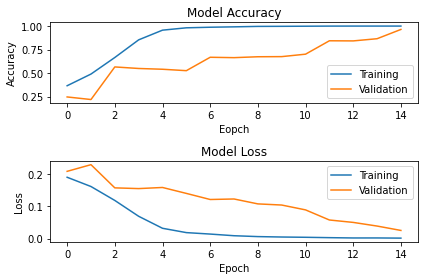

In [ ]:
training_time_start = time.time()
CNN_Model = Model_Generator(X_Train)
CNN_Model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
History_Model = CNN_Model.fit(x=X_Train, y=Y_Train_Labels_Categorical,
                              epochs=15, batch_size=100,
                              validation_data=(X_Validate, Y_Validation_Labels_Categorical))
CNN_Scores = CNN_Model.evaluate(X_Validate, Y_Validation_Labels_Categorical, batch_size=100)
Best_Scores = max(History_Model.history.get('accuracy'))
Y_Pred = CNN_Model.predict(X_Test)
for uknown in Unkown_Signals:
  CNN_Class_Prediciton = []
  Prediction = CNN_Model.predict(uknown)
  CNN_Class_Prediciton.append(np.argmax(Prediction,axis=1))
  CNN_Class_Y_Pred.append(CNN_Class_Prediciton)
training_time_end = time.time()
Execution_Time = training_time_end-training_time_start   
CNN_Generate_Acc_Loss_Plot(History_Model, 1e-3, 15, 100)

## Score Calculations

In [ ]:
if (float(CNN_Scores[3])+float(CNN_Scores[4]) == 0):
  CNN_F1_Score = 0
else:
  CNN_F1_Score = 2*((float(CNN_Scores[3])*float(CNN_Scores[4]))/(float(CNN_Scores[3])+float(CNN_Scores[4])))
print("CNN Mean Square Error: \t\t\t", CNN_Scores[0])
print("CNN Validation Accuracy Score: \t\t", CNN_Scores[1])
print("CNN Best Training Accuracy Score: \t", Best_Scores)
print("CNN F1 Score: \t\t\t\t", CNN_F1_Score)
print("CNN Precision Score: \t\t\t", CNN_Scores[3])
print("CNN Recall Score: \t\t\t", CNN_Scores[4])
print("CNN AUC Score: \t\t\t\t", CNN_Scores[2])
print("Execution Time: \t\t\t", Execution_Time)  

CNN Mean Square Error: 			 0.025242729112505913
CNN Validation Accuracy Score: 		 0.9631147384643555
CNN Best Training Accuracy Score: 	 0.9988290667533875
CNN F1 Score: 				 0.9460992865672527
CNN Precision Score: 			 0.983775794506073
CNN Recall Score: 			 0.9112021923065186
CNN AUC Score: 				 0.997954249382019
Execution Time: 			 13.981619596481323


## ROC Curves Plot

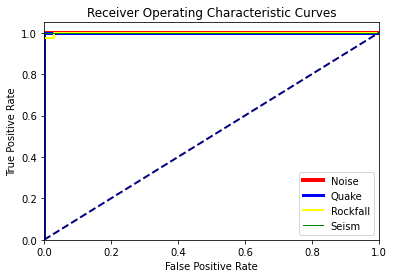

In [ ]:
Y_Test_Labels_Bin = label_binarize(Y_Test_Labels, classes=[0.0, 1.0, 2.0, 3.0])
Num_Classes = Y_Test_Labels_Bin.shape[1]
lw_list = [4, 3, 2, 1]
color_list = ['red','blue','yellow','green']

fpr = dict()
tpr = dict()
thres_r = dict()
roc_auc = dict()

for i in range(Num_Classes):
  fpr[i], tpr[i], thres_r[i] = roc_curve(Y_Test_Labels_Bin[:, i], Y_Pred[:, i])
  plt.plot(fpr[i], tpr[i], color=color_list[i], lw=lw_list[i])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(Target_Names)
plt.gcf()
plt.savefig('/content/drive/MyDrive/dissertation_results/CNN_roc_Y_Pred.png', bbox_inches='tight')
plt.show()



In [ ]:
for i in range(Num_Classes):
  fpr[i], tpr[i], thres_r[i] = roc_curve(Y_Test_Labels_Bin[:, i], Y_Pred[:, i])
  print('AUC for Class {}: {}'.format(Target_Names[i], auc(fpr[i], tpr[i])))

AUC for Class Noise: 1.0
AUC for Class Quake: 1.0
AUC for Class Rockfall: 0.9992574303376835
AUC for Class Seism: 1.0


# *Long Short-Term Memory Neural Network (LSTM)*

## Model Generator

In [ ]:
def LSTM_Generate_Acc_Loss_Plot(History, rate, epoch, batch):
  plt.subplot(211)
  plt.plot(History.history['accuracy'])
  plt.plot(History.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Eopch')
  plt.legend(['Training', 'Validation'], loc='best')
        
  plt.subplot(212)
  plt.plot(History.history['loss'])
  plt.plot(History.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='best')
        
  plt.tight_layout()
  plt.gcf()
  plt.savefig('/content/drive/MyDrive/dissertation_results/LSTM_lr_'+str(rate)+'e_'+str(epoch)+'b_'+str(batch)+'.png', bbox_inches='tight')
  plt.show()

In [ ]:

def LSTM_Model_Generator(X_Train):
  LSTM_Model = Sequential()
  LSTM_Model.add(LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(X_Train.shape[1], X_Train.shape[2])))
  LSTM_Model.add(Dropout(0.2))
  LSTM_Model.add(Flatten())
  LSTM_Model.add(BatchNormalization())
  LSTM_Model.add((Dense(units=4,  activation='softmax')))
  LSTM_Model.build(X_Train.shape)
  LSTM_Model.summary()
  return LSTM_Model

## Model Training

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 2510, 64)          16896     
                                                                 
 dropout_1 (Dropout)         (None, 2510, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 160640)            0         
                                                                 
 batch_normalization_5 (Batc  (None, 160640)           642560    
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 4)                 642564    
                                                                 
Total params: 1,302,020
Trainable params: 980,740
Non-trainable params: 321,280
________________________________________

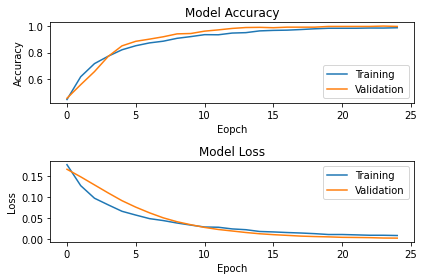

In [ ]:
training_time_start = time.time()
LSTM_Model = LSTM_Model_Generator(X_Train)
LSTM_Model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5),
                   loss=tf.keras.losses.MeanSquaredError(),
                   metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
LSTM_History = LSTM_Model.fit(x=X_Train, y=Y_Train_Labels_Categorical,epochs=25, batch_size=100,
                              validation_data=(X_Validate, Y_Validation_Labels_Categorical), callbacks=[Early_Stop])
LSTM_Scores = LSTM_Model.evaluate(X_Validate, Y_Validation_Labels_Categorical, batch_size=128)
LSTM_Best_Scores = max(LSTM_History.history.get('accuracy'))
LSTM_Y_Pred = LSTM_Model.predict(X_Test)
for uknown in Unkown_Signals:
  LSTM_Class_Prediciton = []
  Prediction = LSTM_Model.predict(uknown)
  LSTM_Class_Prediciton.append(np.argmax(Prediction,axis=1))
  LSTM_Class_Y_Pred.append(LSTM_Class_Prediciton)
training_time_end = time.time()
LSTM_Execution_Time = training_time_end-training_time_start
LSTM_Generate_Acc_Loss_Plot(LSTM_History, 1e-5, 25, 128)

## Score Calculations

In [ ]:
if (float(LSTM_Scores[3])+float(LSTM_Scores[4]) == 0):
  CNN_F1_Score = 0
else:
  CNN_F1_Score = 2*((float(LSTM_Scores[3])*float(LSTM_Scores[4]))/(float(LSTM_Scores[3])+float(LSTM_Scores[4])))
print("CNN Mean Square Error: \t\t\t", LSTM_Scores[0])
print("CNN Validation Accuracy Score: \t\t", LSTM_Scores[1])
print("CNN Best Training Accuracy Score: \t", LSTM_Best_Scores)
print("CNN F1 Score: \t\t\t\t", CNN_F1_Score)
print("CNN Precision Score: \t\t\t", LSTM_Scores[3])
print("CNN Recall Score: \t\t\t", LSTM_Scores[4])
print("CNN AUC Score: \t\t\t\t", LSTM_Scores[2])
print("Execution Time: \t\t\t", LSTM_Execution_Time)  

CNN Mean Square Error: 			 0.0031272280029952526
CNN Validation Accuracy Score: 		 0.9972677826881409
CNN Best Training Accuracy Score: 	 0.98741215467453
CNN F1 Score: 				 0.9972677826881409
CNN Precision Score: 			 0.9972677826881409
CNN Recall Score: 			 0.9972677826881409
CNN AUC Score: 				 0.9999975562095642
Execution Time: 			 155.820960521698


## ROC Curves Plot

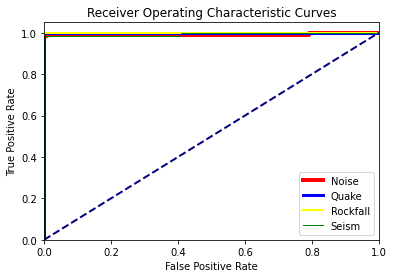

In [ ]:
Y_Test_Labels_Bin = label_binarize(Y_Test_Labels, classes=[0.0, 1.0, 2.0, 3.0])
Num_Classes = Y_Test_Labels_Bin.shape[1]

fpr = dict()
tpr = dict()
thres_r = dict()
roc_auc = dict()

for i in range(Num_Classes):
  fpr[i], tpr[i], thres_r[i] = roc_curve(Y_Test_Labels_Bin[:, i], LSTM_Y_Pred[:, i])
  plt.plot(fpr[i], tpr[i], color=color_list[i], lw=lw_list[i])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(Target_Names)
plt.gcf()
plt.savefig('/content/drive/MyDrive/dissertation_results/LSTM_roc_Y_Pred.png', bbox_inches='tight')
plt.show()

In [ ]:
for i in range(Num_Classes):
  fpr[i], tpr[i], thres_r[i] = roc_curve(Y_Test_Labels_Bin[:, i], LSTM_Y_Pred[:, i])
  print('LSTM AUC for Class {}: {}'.format(Target_Names[i], auc(fpr[i], tpr[i])))

LSTM AUC for Class Noise: 0.9903942282058117
LSTM AUC for Class Quake: 1.0
LSTM AUC for Class Rockfall: 1.0
LSTM AUC for Class Seism: 0.9928811411009922


# Save Predictions


In [ ]:
print(len(CNN_Class_Y_Pred))
print(len(LSTM_Class_Y_Pred))

CNN_Class_Y_Pred = np.array(CNN_Class_Y_Pred)
LSTM_Class_Y_Pred = np.array(LSTM_Class_Y_Pred)

print(len(CNN_Class_Y_Pred))
print(CNN_Class_Y_Pred.shape)
print(CNN_Class_Y_Pred)
print(len(LSTM_Class_Y_Pred))
print(LSTM_Class_Y_Pred.shape)
print(LSTM_Class_Y_Pred)

os.chdir('/content/drive/MyDrive/dissertation_results/')
for i in range(len(CNN_Class_Y_Pred)):
  Reshaped_Predictions = CNN_Class_Y_Pred[i].reshape((719,12))
  np.savetxt('CNN_Window_Predictions_Signal'+str(i)+'.csv', Reshaped_Predictions, delimiter=',')

for i in range(len(LSTM_Class_Y_Pred)):
  Reshaped_Predictions = LSTM_Class_Y_Pred[i].reshape((719,12))
  np.savetxt('LSTM_Window_Predictions_Signal'+str(i)+'.csv', Reshaped_Predictions, delimiter=',')

1
1
1
(1, 1, 8628)
[[[0 0 0 ... 0 0 0]]]
1
(1, 1, 8628)
[[[3 3 3 ... 3 3 3]]]


In [ ]:
# tf.keras.utils.plot_model(CNN_Model, show_shapes=True)
# tf.keras.utils.plot_model(LSTM_Model, show_shapes=True)